# Overview

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

# Business Goal
The job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.

### Read and visualise the data

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib.pyplot import xticks
%matplotlib inline

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [25]:
# read the dataset
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [26]:
# basics of the df
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [27]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Clean the data

In [28]:
# missing values
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [29]:
# drop all rows having missing values
country_df = country_df.dropna()
country_df.shape

(167, 10)

In [30]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Prepare the data for modelling

In [31]:

#Converting the data from percentage to numerical form
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100

In [32]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Exploratory Data Analytics

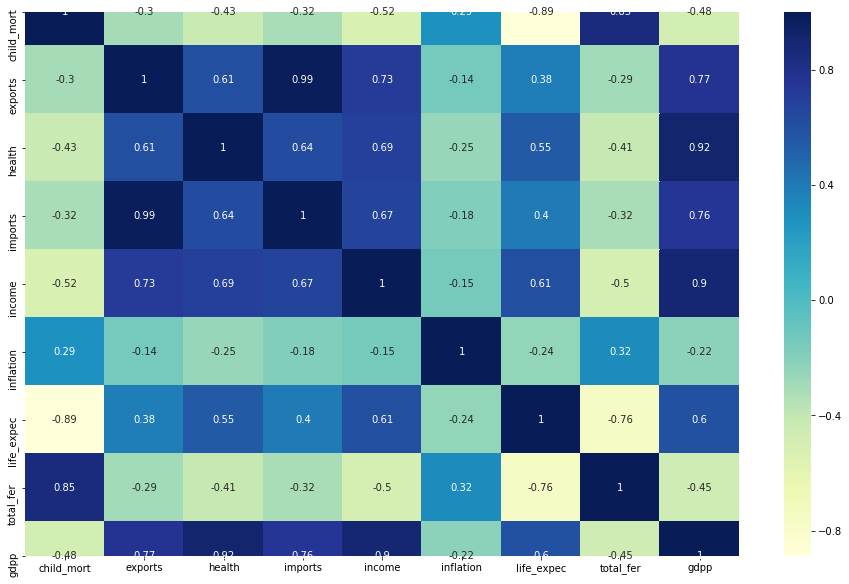

In [33]:
#correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(country_df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

### We will have a look on the lowest 10 countries for each factor.

In [34]:

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
top10_child_mort

,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0
113,Nigeria,130.0
112,Niger,123.0
3,Angola,119.0
25,Burkina Faso,116.0
37,"Congo, Dem. Rep.",116.0


In [35]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
top10_total_fer

,country,total_fer
112,Niger,7.49
32,Chad,6.59
97,Mali,6.55
37,"Congo, Dem. Rep.",6.54
26,Burundi,6.26
149,Timor-Leste,6.23
3,Angola,6.16
155,Uganda,6.15
25,Burkina Faso,5.87
113,Nigeria,5.84


In [36]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = country_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
bottom10_life_expec

,country,life_expec
66,Haiti,32.1
87,Lesotho,46.5
31,Central African Republic,47.5
166,Zambia,52.0
94,Malawi,53.1
137,South Africa,54.3
106,Mozambique,54.5
132,Sierra Leone,55.0
64,Guinea-Bissau,55.6
0,Afghanistan,56.2


In [37]:
# Health :Total health spending as %age of Total GDP.

bottom10_health = country_df[['country','health']].sort_values('health', ascending = True).head(10)
bottom10_health

,country,health
50,Eritrea,12.8212
93,Madagascar,15.5701
31,Central African Republic,17.7508
112,Niger,17.9568
107,Myanmar,19.4636
106,Mozambique,21.8299
116,Pakistan,22.8800
37,"Congo, Dem. Rep.",26.4194
12,Bangladesh,26.6816
26,Burundi,26.7960


In [38]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = country_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
bottom10_gdpp

,country,gdpp
26,Burundi,231
88,Liberia,327
37,"Congo, Dem. Rep.",334
112,Niger,348
132,Sierra Leone,399
93,Madagascar,413
106,Mozambique,419
31,Central African Republic,446
94,Malawi,459
50,Eritrea,482


In [39]:
# Per capita Income : Net income per person

bottom10_income = country_df[['country','income']].sort_values('income', ascending = True).head(10)
bottom10_income

,country,income
37,"Congo, Dem. Rep.",609
88,Liberia,700
26,Burundi,764
112,Niger,814
31,Central African Republic,888
106,Mozambique,918
94,Malawi,1030
63,Guinea,1190
150,Togo,1210
132,Sierra Leone,1220


In [40]:
 #Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
top10_inflation

,country,inflation
113,Nigeria,104.0
163,Venezuela,45.9
103,Mongolia,39.2
149,Timor-Leste,26.5
49,Equatorial Guinea,24.9
165,Yemen,23.6
140,Sri Lanka,22.8
3,Angola,22.4
5,Argentina,20.9
37,"Congo, Dem. Rep.",20.8


In [41]:
# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = country_df[['country','exports']].sort_values('exports', ascending = True).head(10)
bottom10_exports

,country,exports
107,Myanmar,1.07692
26,Burundi,20.60520
50,Eritrea,23.08780
31,Central African Republic,52.62800
0,Afghanistan,55.30000
109,Nepal,56.71360
88,Liberia,62.45700
132,Sierra Leone,67.03200
126,Rwanda,67.56000
112,Niger,77.25600


In [42]:
# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = country_df[['country','imports']].sort_values('imports', ascending = True).head(10)
bottom10_imports

,country,imports
107,Myanmar,0.651092
26,Burundi,90.552000
50,Eritrea,112.306000
31,Central African Republic,118.190000
132,Sierra Leone,137.655000
94,Malawi,160.191000
12,Bangladesh,165.244000
37,"Congo, Dem. Rep.",165.664000
126,Rwanda,168.900000
155,Uganda,170.170000


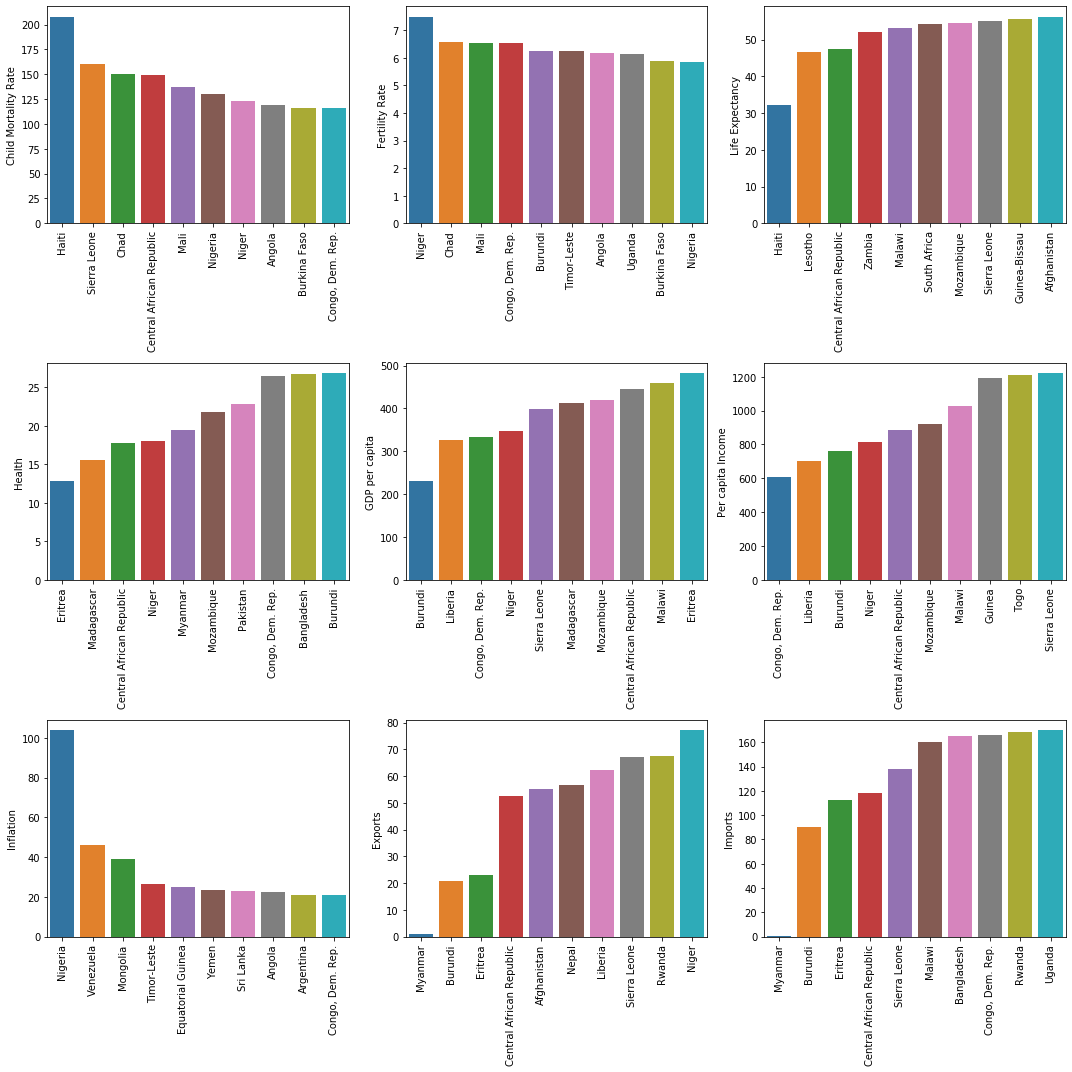

In [43]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')

plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')

plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')

plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

### Outlier Analysis

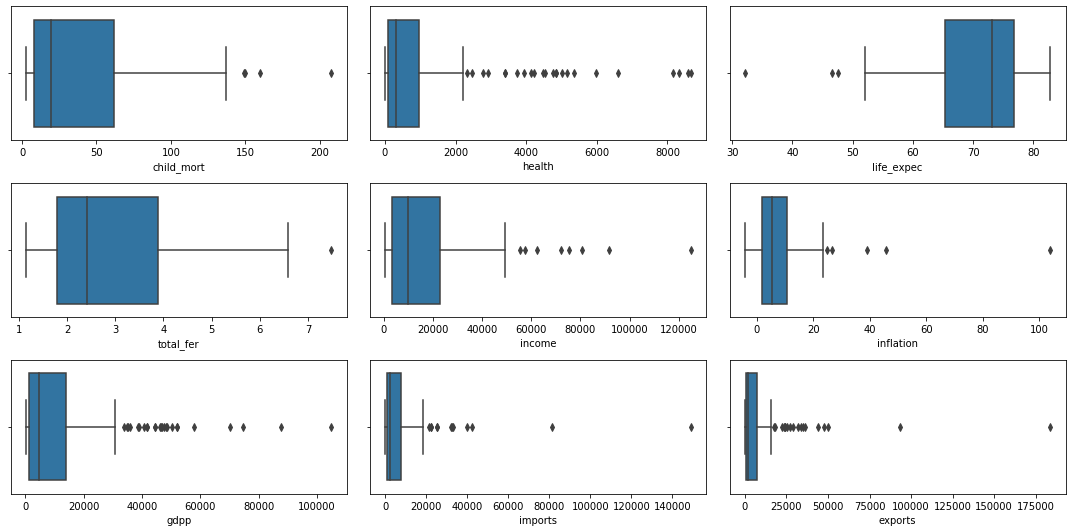

In [44]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(country_df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_df['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_df['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_df['exports'], ax = axs[2,2])


plt.tight_layout()

In [45]:
# Finding if there are outliers
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [46]:
# Copy original data before scaling
country_dfdup = country_df.copy()
country_dfdup.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Capping the Outliers for analysis

In [47]:
# removing (statistical) outliers
Q1 = country_dfdup.child_mort.quantile(0.05)
Q3 = country_dfdup.child_mort.quantile(0.95)
IQR = Q3 - Q1
country_dfdup = country_dfdup[(country_dfdup.child_mort >= Q1 - 1.5*IQR) & (country_dfdup.child_mort <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = country_dfdup.health.quantile(0.05)
Q3 = country_dfdup.health.quantile(0.95)
IQR = Q3 - Q1
country_dfdup = country_dfdup[(country_dfdup.health >= Q1 - 1.5*IQR) & (country_dfdup.health <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = country_dfdup.imports.quantile(0.05)
Q3 = country_dfdup.imports.quantile(0.95)
IQR = Q3 - Q1
country_dfdup = country_dfdup[(country_dfdup.imports >= Q1 - 1.5*IQR) & (country_dfdup.imports <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = country_dfdup.income.quantile(0.05)
Q3 = country_dfdup.income.quantile(0.95)
IQR = Q3 - Q1
country_dfdup = country_dfdup[(country_dfdup.income >= Q1 - 1.5*IQR) & (country_dfdup.income <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = country_dfdup.inflation.quantile(0.05)
Q3 = country_dfdup.inflation.quantile(0.95)
IQR = Q3 - Q1
country_dfdup = country_dfdup[(country_dfdup.inflation >= Q1 - 1.5*IQR) & (country_dfdup.inflation <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = country_dfdup.life_expec.quantile(0.05)
Q3 = country_dfdup.life_expec.quantile(0.95)
IQR = Q3 - Q1
country_dfdup = country_dfdup[(country_dfdup.life_expec >= Q1 - 1.5*IQR) & (country_dfdup.life_expec <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = country_dfdup.total_fer.quantile(0.05)
Q3 = country_dfdup.total_fer.quantile(0.95)
IQR = Q3 - Q1
country_dfdup = country_dfdup[(country_dfdup.total_fer >= Q1 - 1.5*IQR) & (country_dfdup.total_fer <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = country_dfdup.gdpp.quantile(0.05)
Q3 = country_dfdup.gdpp.quantile(0.95)
IQR = Q3 - Q1
country_dfdup = country_dfdup[(country_dfdup.gdpp >= Q1 - 1.5*IQR) & (country_dfdup.gdpp <= Q3 + 1.5*IQR)]
country_dfdup

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


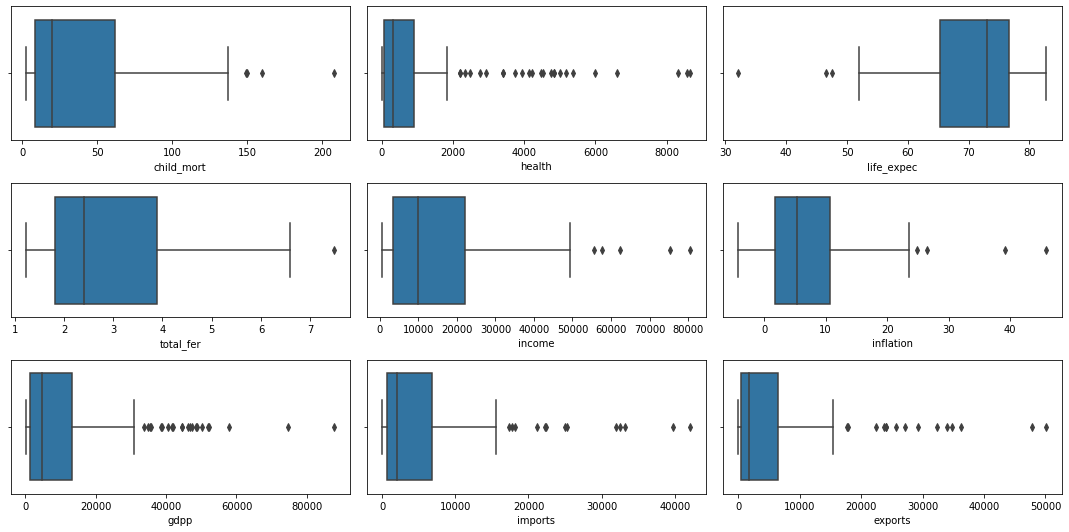

In [48]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(country_dfdup['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_dfdup['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_dfdup['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_dfdup['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_dfdup['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_dfdup['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_dfdup['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_dfdup['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_dfdup['exports'], ax = axs[2,2])

plt.tight_layout()

### Scaling the data

In [49]:
cntry_df = country_dfdup[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
country_df_scaled = scaler.fit_transform(cntry_df)
country_df_scaled.shape

(163, 9)

## Clustering

### Hopkins Statistics

In [50]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [51]:
#Let's check the Hopkins measure
hopkins(country_dfdup.drop('country', axis = 1))

0.9246303921921494

In [ ]:
#Since the hopkins value is > 0.5 the given dataset has a good tendency to form clusters.

### K- means Clustering 

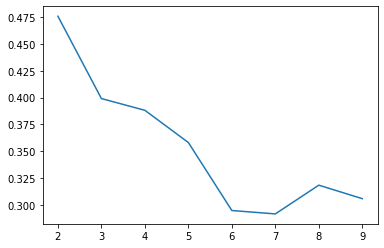

In [52]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(country_df_scaled)
    sse_.append([k, silhouette_score(country_df_scaled, kmeans.labels_)])
    
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [308]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.47582164792275383
For n_clusters=3, the silhouette score is 0.3990749120733062
For n_clusters=4, the silhouette score is 0.38811074109023863
For n_clusters=5, the silhouette score is 0.35134342467986
For n_clusters=6, the silhouette score is 0.2943435302255164
For n_clusters=7, the silhouette score is 0.2859834789701271
For n_clusters=8, the silhouette score is 0.28806464007974053


###  Elbow Curve plot and choose the optimal number of cluster

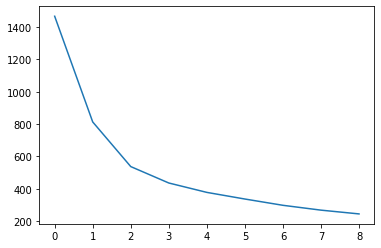

In [309]:

#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_df_scaled)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [53]:
# we see bend at around 3 clusters

### performing K means using K=3

In [54]:
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [55]:
# assign the label
country_dfdup['cluster_id'] = kmeans.labels_
country_dfdup.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,4
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,6
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


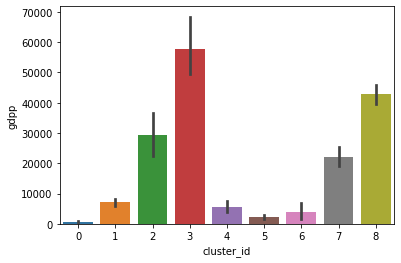

In [56]:
# plot
sns.barplot(x='cluster_id', y='gdpp', data=country_dfdup)

In [57]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([country_df.reset_index().drop('index', axis = 1), pd.Series(kmeans.labels_)], axis = 1)
df_km.columns = ['country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,4.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,6.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.0


In [58]:
# Cross-check
df_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    4
dtype: int64

In [59]:
# Check the count of observation per cluster
df_km['cluster_id'].value_counts()

1.0    43
5.0    30
0.0    22
4.0    17
7.0    15
6.0    12
8.0    11
3.0     8
2.0     5
Name: cluster_id, dtype: int64

### Cluster Profiling

In [60]:
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,4.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,6.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.0


In [61]:
df_km.groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0.0,82.959091,1171.520327,257.081809,1260.413727,4476.000000,5.077318,60.981818,4.453636,3175.409091
1.0,22.476744,7589.529116,798.352886,7031.780023,15210.000000,6.435209,73.890698,2.370465,10549.511628
2.0,36.080000,11073.678000,679.588200,5395.924000,40410.000000,30.622000,72.640000,2.722000,19506.000000
3.0,27.375000,17474.112450,2675.932725,15961.908250,24410.500000,5.955375,74.187500,2.698750,25997.500000
4.0,21.547059,4341.048235,1043.337765,4079.078824,18736.470588,10.539000,72.023529,2.347059,11197.058824
5.0,48.793333,6829.123724,624.654490,5440.896503,14450.600000,6.406467,67.710000,3.230333,10057.033333
6.0,62.158333,9843.867333,1146.782900,8348.290833,16349.083333,14.875583,66.716667,3.963333,13174.333333
7.0,17.680000,9409.943600,1274.274760,9373.318533,24624.666667,2.739867,75.080000,2.244667,17523.200000
8.0,16.281818,13480.715000,3765.988136,12527.760909,33361.818182,2.166909,77.881818,2.242727,36857.727273


In [62]:
# Cluster profiling using GDPP, Child_mort , Income

In [63]:
clu_gdpp = pd.DataFrame(df_km.groupby(["cluster_id"]).gdpp.median())
clu_child_mort=pd.DataFrame(df_km.groupby(["cluster_id"]).child_mort.median())
clu_income =pd.DataFrame(df_km.groupby(["cluster_id"]).income.median())

In [64]:
cluster_df = pd.concat([pd.Series([0,1,2,3]),clu_gdpp,clu_child_mort,clu_income], axis=1)
cluster_df.columns = ["cluster_id","GDPP","child_mort","income"]
cluster_df

,cluster_id,GDPP,child_mort,income
0.0,0.0,827.5,89.75,2020
1.0,1.0,5450.0,16.50,11100
2.0,2.0,10700.0,10.80,23100
3.0,3.0,25315.0,7.85,25510
4.0,NaN,6030.0,17.40,16200
5.0,NaN,1485.0,48.00,4195
6.0,NaN,4015.0,63.80,9300
7.0,NaN,19300.0,7.00,25200
8.0,NaN,41900.0,4.20,38800


In [65]:
# Analysis of the clusters

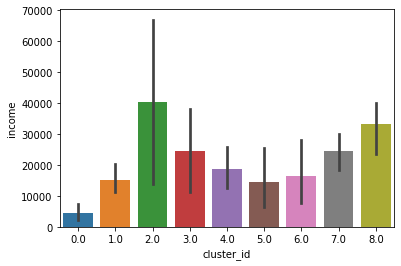

In [66]:
sns.barplot(x='cluster_id', y='income', data=df_km)

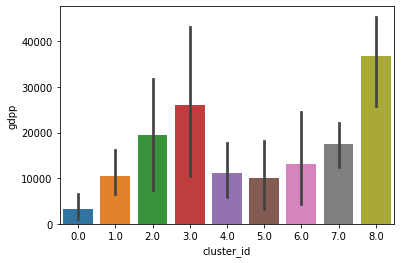

In [67]:
sns.barplot(x='cluster_id', y='gdpp', data=df_km)

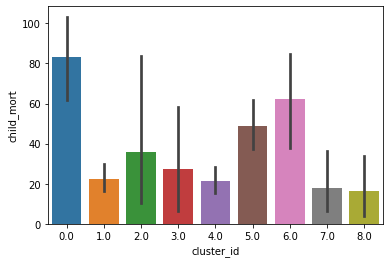

In [68]:
sns.barplot(x='cluster_id', y='child_mort', data=df_km)

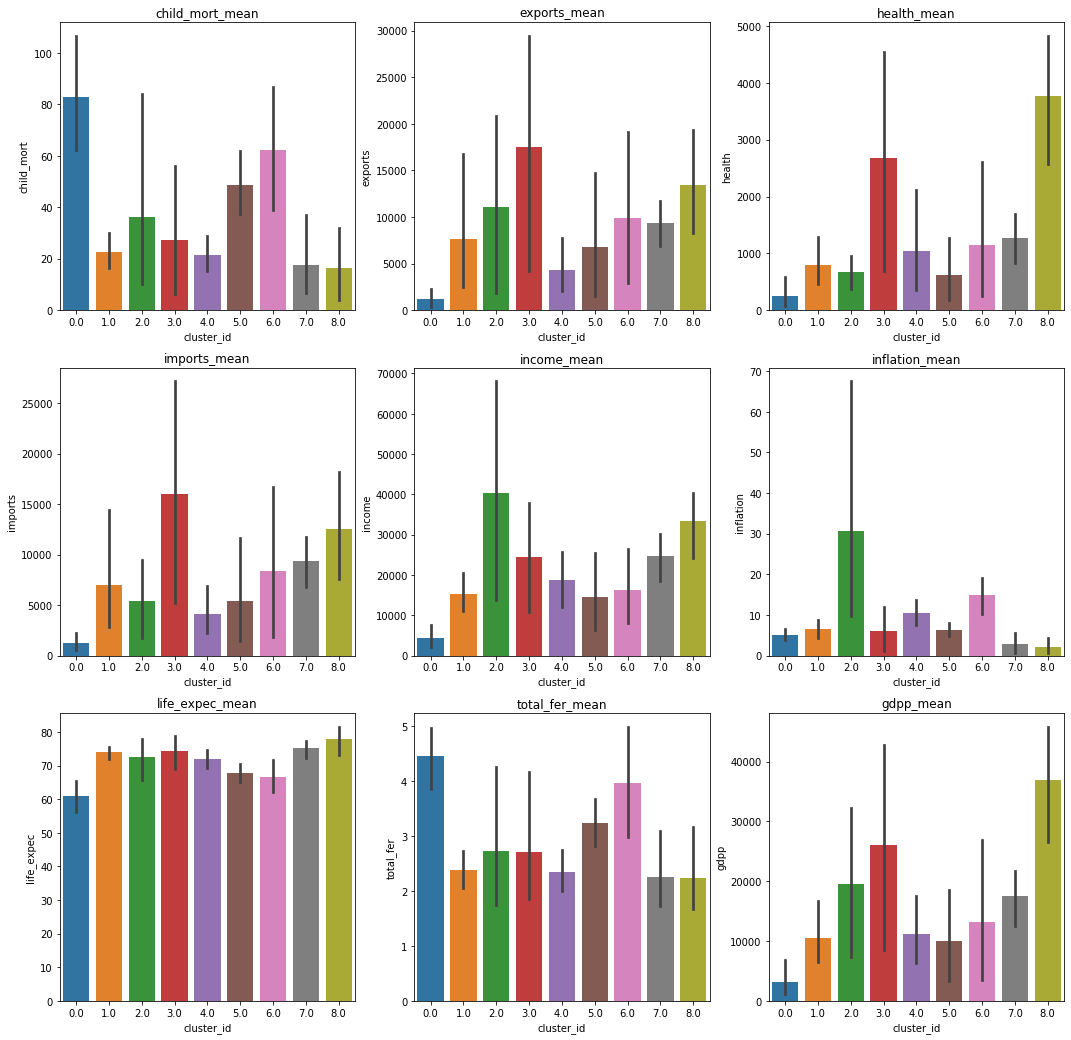

In [80]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(df_km.cluster_id, df_km.child_mort)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(df_km.cluster_id, df_km.exports)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(df_km.cluster_id, df_km.health)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(df_km.cluster_id, df_km.imports)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(df_km.cluster_id, df_km.income)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(df_km.cluster_id, df_km.inflation)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(df_km.cluster_id, df_km.life_expec)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(df_km.cluster_id, df_km.total_fer)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(df_km.cluster_id, df_km.gdpp)


### As per plot , cluster which has lowest gdpp, lowest income and highest child mortality that countries requires direct need of aid

In [ ]:
# highest child mortality
# Lowest income
# Lowest gdpp.

In [69]:
#Let us bin our cluster 0
cluster_km=df_km[df_km['cluster_id']==0]
cluster_km.sort_values(['gdpp','child_mort','income'], 
                      ascending=[True,False,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0.0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0.0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0.0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0.0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,0.0


# Hierarchical Clustering

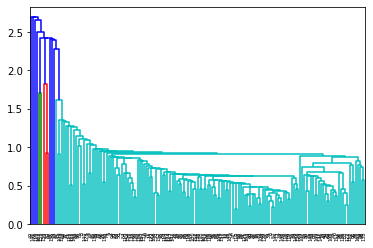

In [70]:
#single linkage
mergings = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

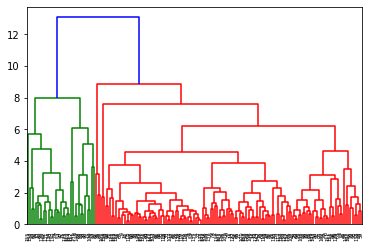

In [71]:
# complete linkage
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [72]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,4.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,6.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.0


In [73]:
country_hc = pd.concat([country_df.reset_index().drop('index', axis = 1) ,clusterCut], axis=1)
country_hc.columns = ['country', 'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp',
                  'cluster_id']
country_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.0


In [74]:
country_hc['cluster_id'].value_counts()

0.0    127
1.0     21
2.0     12
3.0      3
Name: cluster_id, dtype: int64

In [75]:
child_mort_mean_hc = pd.DataFrame(country_hc.groupby(["cluster_id"]).child_mort.mean())
exports_mean_hc= pd.DataFrame(country_hc.groupby(["cluster_id"]).exports.mean())
health_mean_hc = pd.DataFrame(country_hc.groupby(["cluster_id"]).health.mean())
imports_mean_hc = pd.DataFrame(country_hc.groupby(["cluster_id"]).imports.mean())
income_mean_hc = pd.DataFrame(country_hc.groupby(["cluster_id"]).income.mean())
inflat_mean_hc = pd.DataFrame(country_hc.groupby(["cluster_id"]).inflation.mean())
life_expec_mean_hc = pd.DataFrame(country_hc.groupby(["cluster_id"]).life_expec.mean())
total_fer_mean_hc = pd.DataFrame(country_hc.groupby(["cluster_id"]).total_fer.mean())
gdpp_mean_hc = pd.DataFrame(country_hc.groupby(["cluster_id"]).gdpp.mean())


In [76]:
country_analysis_df_hc= pd.concat([pd.Series([0,1,2,3]),child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflat_mean_hc,life_expec_mean_hc,
                                 total_fer_mean_hc,gdpp_mean_hc], axis=1)

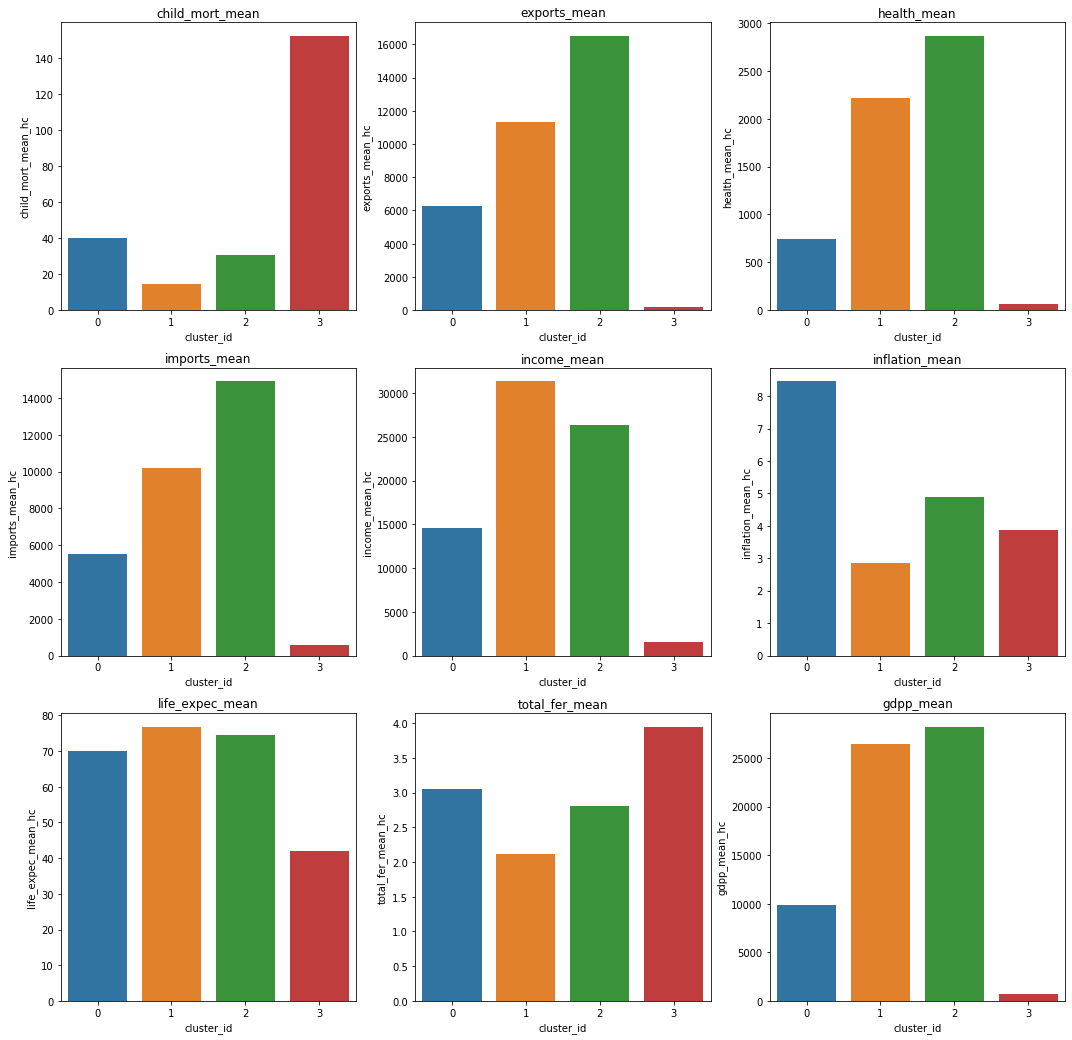

In [82]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_analysis_df_hc.cluster_id, country_analysis_df_hc.child_mort_mean_hc)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(country_analysis_df_hc.cluster_id, country_analysis_df_hc.exports_mean_hc)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(country_analysis_df_hc.cluster_id, country_analysis_df_hc.health_mean_hc)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(country_analysis_df_hc.cluster_id, country_analysis_df_hc.imports_mean_hc)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(country_analysis_df_hc.cluster_id, country_analysis_df_hc.income_mean_hc)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(country_analysis_df_hc.cluster_id, country_analysis_df_hc.inflation_mean_hc)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(country_analysis_df_hc.cluster_id, country_analysis_df_hc.life_expec_mean_hc)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(country_analysis_df_hc.cluster_id, country_analysis_df_hc.total_fer_mean_hc)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(country_analysis_df_hc.cluster_id, country_analysis_df_hc.gdpp_mean_hc)

plt.show()


In [77]:

country_analysis_df_hc.columns = ["cluster_id","child_mort_mean_hc","exports_mean_hc","health_mean_hc","imports_mean_hc","income_mean_hc","inflation_mean_hc","life_expec_mean_hc","total_fer_mean_hc","gdpp_mean_hc"]
country_analysis_df_hc


,cluster_id,child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflation_mean_hc,life_expec_mean_hc,total_fer_mean_hc,gdpp_mean_hc
0.0,0,40.044882,6280.786102,743.216074,5517.624284,14611.897638,8.453378,69.924409,3.054646,9859.000000
1.0,1,14.433333,11302.618810,2220.062500,10218.420952,31322.857143,2.865952,76.819048,2.116190,26403.571429
2.0,2,30.483333,16490.810300,2863.751683,14906.089500,26346.166667,4.882667,74.591667,2.800000,28215.666667
3.0,3,152.233333,204.964667,64.455000,576.068000,1589.333333,3.870000,42.033333,3.946667,759.333333


In [78]:
### With business aspect,ignoring cluster 3 as it has only 3 country) Looking at the graph we are certain that cluster 0 is our cluster of concern. Because:

#It has highest child mortality
#Lowest income
#Highest Inflation
#Compartively low life expectancy
#Highest total fertility
#Which all in turn leads to lowest gdpp.

In [87]:
#Let us bin our cluster 0
cluster_hc=country_hc[country_hc['cluster_id']==0]
cluster_hc.sort_values(['gdpp','child_mort','income'], 
                      ascending=[True,False,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0.0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0.0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0.0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0.0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0.0


As per Heirarchical Clustering, the countries which require aid are:

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Sierra Leone
5. Madagascar


As per K-Means Clustering, the countries which require aid are: 

1. Burundi
2. Liberia
3. Madagascar
4. Central African Republic
5. Guinea-Bissau

Above are the following countries which are in direct need of aid by considering socio – economic factor into consideration.